# Answering the Science Question

This notebook serves as a demo for answering the science question underlying the design of my Antarctica Temperature regional model. You can follow and/or adapt this notebook based on your science question.

For reference, the science question for my model is: **How has global warming significantly impacted Antarctica's sea surface temperature over the past decade?**

First, import packages to re-create and visualize the model fields here:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Next, define the location of the project directory for the model:

In [2]:
# define the input directory
project_dir = '/Users/eddie/Documents/CS185C/Project'

Then, re-create the model grid

In [3]:
delX = 1/12
delY = 1/12
xgOrigin = -80
ygOrigin = -80
n_rows = 360
n_cols = 360

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY, delY)
XC, YC = np.meshgrid(xc, yc)

## Plot a model field at one timestep
To assess the temperature differences spatially, I'll plot the differences between the model results during 2017 and 2007. I'll choose one field near the end of my simulation:

In [5]:
# read in the grid during 2017
grid_2017 = np.fromfile(os.path.join(project_dir,'run','diags',
                                     'TS_3D_mon_mean',
                                     'TS_3D_mon_mean.0000000001.data'), '>f4')
grid_2017 = grid_2017.reshape((50,n_rows,n_cols))

# read in the grid during 2007
grid_2007 = np.fromfile(os.path.join(project_dir,'run','diags',
                                     'TS_3D_mon_mean_2007',
                                     'TS_3D_mon_mean_2007.0000000001.data'), '>f4')
grid_2007 = grid_2007.reshape((50,n_rows,n_cols))

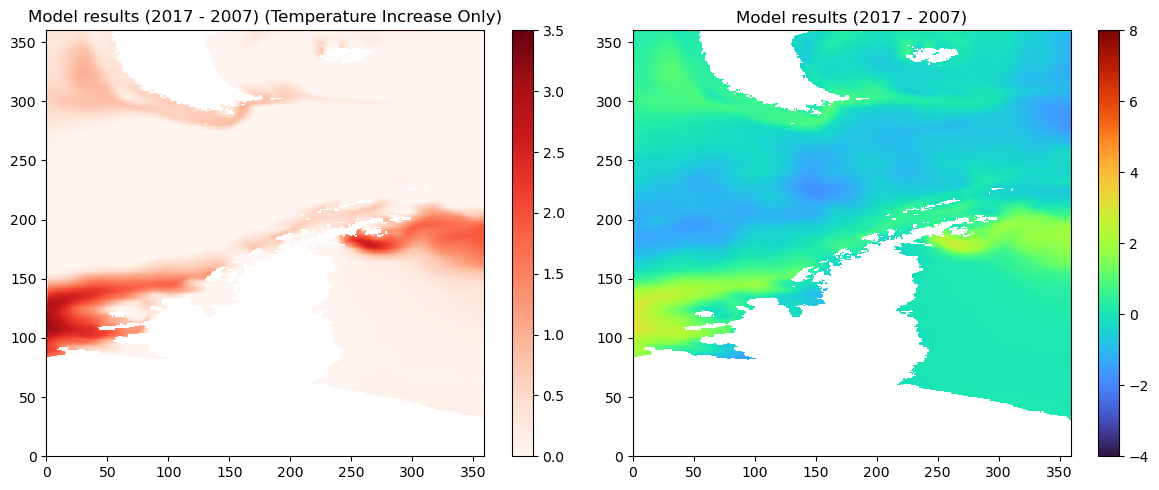

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 
diff = grid_2017[0, :, :-1] - grid_2007[0, :, :-1]
land_white = np.ma.masked_where(grid_2007[0, :, :-1] == 0, diff)

# temp increase only
cmap1 = plt.get_cmap('Reds').copy()
cmap1.set_bad(color='white')

im1 = axes[0].pcolormesh(land_white, cmap=cmap1, vmin=0, vmax=3.5)
fig.colorbar(im1, ax=axes[0])
axes[0].set_title('Model results (2017 - 2007) (Temperature Increase Only)')

# change in temp
cmap2 = plt.get_cmap('turbo').copy()
cmap2.set_bad(color='white')

im2 = axes[1].pcolormesh(land_white, cmap=cmap2, vmin=-4, vmax=8)
fig.colorbar(im2, ax=axes[1])
axes[1].set_title('Model results (2017 - 2007)')

plt.tight_layout()
plt.show()


As we can see, there has been about about a ~0.3 degrees Celsius increase in sea temperature in the depicted region on average. In some parts of the sea, the increase is as high as 3 degrees Celsius from the years 2007 and 2017. 

## Make a timeseries
Next we can see how the differences between the models is evolving through time. For this example, I'll choose a point in the domain near the coast as in my previous notebook:

In [21]:
row = 170
col = 250

Then, I'll loop through all of the output files to generate a timeseries:

In [26]:
timestep_numbers_2017 = []
theta_2017_values = []
for file_name in sorted(os.listdir(os.path.join(project_dir, 'run', 'diags', 'TS_3D_mon_mean'))):
    if file_name.endswith('.data'):
        timestep_numbers_2017.append(int(file_name.split('.')[-2]))
        grid = np.fromfile(os.path.join(project_dir, 'run', 'diags', 'TS_3D_mon_mean', file_name), '>f4')
        grid = grid.reshape((50, n_rows, n_cols))
        theta_2017_values.append(grid[0, row, col])

timestep_numbers_2007 = []
theta_2007_values = []
for file_name in sorted(os.listdir(os.path.join(project_dir, 'run', 'diags', 'TS_3D_mon_mean_2007'))):
    if file_name.endswith('.data'):
        timestep_numbers_2007.append(int(file_name.split('.')[-2]))
        grid = np.fromfile(os.path.join(project_dir, 'run', 'diags', 'TS_3D_mon_mean_2007', file_name), '>f4')
        grid = grid.reshape((50, n_rows, n_cols))
        theta_2007_values.append(grid[0, row, col])


Finally, I'll plot the timeseries to see the comparison:

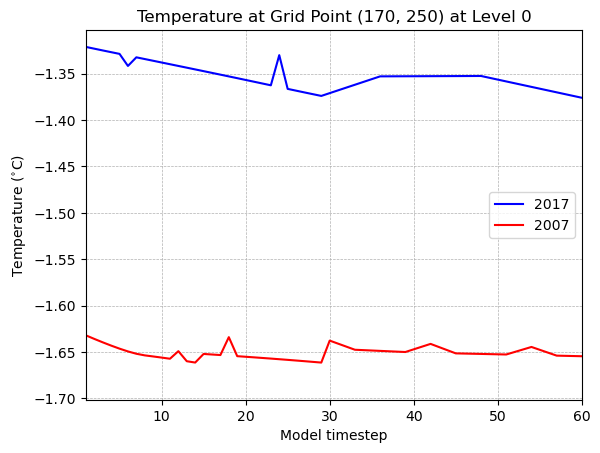

In [28]:
plt.plot(timestep_numbers_2017, theta_2017_values, 'b-', label='2017')
plt.plot(timestep_numbers_2007, theta_2007_values, 'r-', label='2007')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Model timestep')
plt.legend()
plt.grid(linestyle='--', linewidth=0.5)
plt.title(f'Temperature at Grid Point ({row}, {col}) at Level 0')
plt.xlim([1, 60])
plt.show()

In [36]:
# Compute averages
theta_2017_array = np.array(theta_2017_values)
theta_2007_array = np.array(theta_2007_values)

average_theta_2017 = np.mean(theta_2017_array)
average_theta_2007 = np.mean(theta_2007_array)

print(f"Average (2017): {average_theta_2017}")
print(f"Average (2007): {average_theta_2007}")
print(f"Average Difference: {average_theta_2017 - average_theta_2007}")

Average (2017): -1.347806453704834
Average (2007): -1.656578779220581
Average Difference: 0.30877232551574707


As we can see from the timeseries and the averages, there has been roughly a 0.309 degrees Celsius difference in the selected point of the region. It demonstrates that global warming has significantly impacted Antarctica's sea surface temperature over the past decade. 